## Imports

In [15]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from typing import List

from datasets import load_d4ls

pd.set_option('display.max_columns', None)

## EDA utils

In [121]:
def make_class_distribution_plot(
        df: DataFrame,
        class_var: str,
        title: str,
        ) -> None:
    r"""
    Plot the distribution of the given class variable in the dataframe.
    """

    plt.figure(figsize=(10, 4))
    plt.bar(df[class_var].value_counts().index, df[class_var].value_counts().values / len(df), color='grey', edgecolor='black')
    plt.xticks(rotation=35)
    plt.xlabel(class_var)
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

def make_histograms(
        df: DataFrame,
        quant_vars: List[str],
        title: str,
        ) -> None:
    r"""
    Plot histograms of the given quantitative variables in the dataframe.
    """

    num_plots = len(quant_vars)
    num_rows = (num_plots + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(14, 4 * num_rows))
    fig.suptitle(title)

    for i, var in enumerate(quant_vars):
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        ax.hist(df[var], density=True, bins=100, color='grey', edgecolor='black')
        ax.set_xlabel(var)
        ax.set_ylabel('Probability Density')

    plt.show()


def make_boxplots(
        df: DataFrame,
        quant_vars: List[str],
        title: str,
        ) -> None:
    r"""
    Plot boxplots of the given quantitative variables in the dataframe.
    """

    num_plots = len(quant_vars)
    num_rows = (num_plots + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
    fig.suptitle(title)

    for i, var in enumerate(quant_vars):
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        ax.boxplot(df[var], vert=False, patch_artist=True, boxprops=dict(facecolor='grey', color='black'), whiskerprops=dict(color='black'), capprops=dict(color='black'), medianprops=dict(color='black'), flierprops=dict(marker='o', markersize=3, linestyle='none'))
        ax.set_xlabel(var)
        ax.set_ylabel('Value')

    plt.show()


def make_boxplots_per_celltype(
        df: DataFrame,
        class_var: str,
        quant_var: str,
        title: str,
        ) -> None:
    r"""
    Plot boxplots of the given quantitative variables in the dataframe, grouped by cell type.
    """

    x = [group[quant_var].values for _, group in df.groupby(class_var, observed=True)]
    labels = df[class_var].unique()

    plt.figure(figsize=(12, 6))
    plt.boxplot(x=x, labels=labels, vert=False, patch_artist=True, 
                boxprops=dict(facecolor='grey', color='black'), 
                whiskerprops=dict(color='black'), 
                capprops=dict(color='black'), 
                medianprops=dict(color='black'), 
                flierprops=dict(marker='o', markersize=3, linestyle='none'))
    plt.title(title)
    plt.show()


def make_corr_plot(
        df: DataFrame,
        vars: List[str],
        title: str,
        method: str = 'spearman',
        ) -> None:
    r"""
    Plot a correlation matrix of the given variables in the dataframe.
    """

    correlation_matrix = df[vars].corr(method=method)
    plt.figure(figsize=(5, 4))
    plt.imshow(correlation_matrix, cmap='grey', interpolation='nearest')
    plt.colorbar()
    plt.xticks(range(len(vars)), vars, rotation=45)
    plt.yticks(range(len(vars)), vars)
    plt.title(title)
    plt.show()

## Loading anndata

In [7]:
train_anndata = load_d4ls.load_full_anndata()

## Tabular data exploration

### Checking types and missing data

In [1]:
display(train_anndata.obs.columns)

NameError: name 'train_anndata' is not defined

In [ ]:
display(train_anndata.obs.dtypes)

In [ ]:
display(train_anndata.obs.head())

In [ ]:
display(train_anndata.obs.isna().sum())

`train_anndata.var` stores the information about the marker names. Please use the `marker` column in your analysis. `use_channel` indicates wheather a channel is used in practice.

In [9]:
display(train_anndata.var.columns)
display(train_anndata.var.dtypes)
display(train_anndata.var.head())
display(train_anndata.var.isna().sum())

Index(['channel', 'use_channel', 'marker'], dtype='object')

channel        object
use_channel     int64
marker         object
dtype: object

,channel,use_channel,marker
0,Y89,1,MPO
1,In113,0,HistoneH3
2,In115,1,SMA
3,Pr141,1,CD16
4,Nd142,1,CD38


channel        0
use_channel    0
marker         0
dtype: int64

`train_anndata.layers['exprs']` with shape `(train_anndata.obs.shape[0], train_anndata.var.shape[0])` stores the matrix with marker expressions for each cell:

In [10]:
display(train_anndata.layers)
layer_types = [type(layer) for layer in train_anndata.layers.values()]
display(layer_types)
display(train_anndata.layers['counts'].shape)
display(train_anndata.layers['counts'].dtype)
display(train_anndata.layers['exprs'].shape)
display(train_anndata.layers['exprs'].dtype)
display(train_anndata.layers['counts'][0, :])
display(train_anndata.layers['exprs'][0, :])

Layers with keys: counts, exprs

[numpy.ndarray, numpy.ndarray]

(236791, 40)

dtype('float64')

(236791, 40)

dtype('float64')

array([0.00000000e+00, 3.00487801e+00, 5.24085074e-01, 1.63121123e+00,
       5.38077078e-01, 1.39689170e+01, 4.14863152e-01, 4.71328164e-01,
       5.53716363e-01, 9.51141859e+00, 4.82727198e+00, 0.00000000e+00,
       2.71752312e+01, 9.78622061e-01, 1.85967990e-01, 5.45270696e-01,
       2.54381183e+00, 5.10140185e-01, 5.19902128e-01, 4.32341601e-01,
       2.41904620e-01, 2.56278374e-01, 8.55667860e-01, 2.09217334e+00,
       3.67347311e-01, 9.01104312e-02, 3.39458383e-01, 8.31787371e-01,
       1.13483259e+00, 3.10664630e-02, 8.77724513e-01, 5.98150581e-01,
       2.51181416e+00, 6.40469544e+00, 8.58074995e-01, 0.00000000e+00,
       1.79422707e+01, 4.37116955e-01, 5.84347093e+01, 1.00301352e+02])

array([0.        , 1.81998789, 0.50264976, 1.2654101 , 0.51500715,
       3.33126057, 0.40379979, 0.45542107, 0.52873423, 2.94839226,
       2.27798847, 0.        , 3.99579148, 0.86617603, 0.18491241,
       0.52133242, 1.66338067, 0.49026304, 0.49894161, 0.41989374,
       0.23960538, 0.25355285, 0.77554996, 1.48411277, 0.35955019,
       0.08998893, 0.33325552, 0.75729804, 0.97357613, 0.03106147,
       0.79221775, 0.56723839, 1.6516099 , 2.55621816, 0.77737784,
       0.        , 3.58108228, 0.42427316, 4.76113044, 5.30135121])

### Checking values

In [11]:
train_anndata.obs.columns

Index(['image', 'sample_id', 'ObjectNumber', 'Pos_X', 'Pos_Y', 'area',
       'major_axis_length', 'minor_axis_length', 'eccentricity', 'width_px',
       'height_px', 'acquisition_id', 'SlideId', 'Study', 'Box.Description',
       'Position', 'SampleId', 'Indication', 'BatchId', 'SubBatchId', 'ROI',
       'ROIonSlide', 'includeImage', 'flag_no_cells', 'flag_no_ROI',
       'flag_total_area', 'flag_percent_covered', 'small_cell', 'celltypes',
       'flag_tumor', 'PD1_pos', 'Ki67_pos', 'cleavedPARP_pos', 'GrzB_pos',
       'tumor_patches', 'distToCells', 'CD20_patches', 'Batch', 'cell_labels'],
      dtype='object')

Train `anndata` `obs` dataframe stores the information about cells. Each row in this table represent an information about a single cell. It has the following columns that are interesting for your analysis:
- `image` - name of the image file from which a cell was obtained,
- `sample_id` - name of the patient sample from which a given image was obtained,
- `ObjectNumber` - a cell number within a given image (note that it starts from 1),
- `Pos_X`, `Pos_Y` - a spatial position of the cell one the image,
- `area`, `major_axis_length`, `minor_axis_length`, `eccentricity`, `width_px`, `height_px` - shape-derived features of a cell,
- `Batch` - a batch in which a sample was used,
- `cell_labels` - your target cell type annotations. **THIS IS WHAT YOUR MODELS AIM TO PREDICT!**

### Cell type distribution

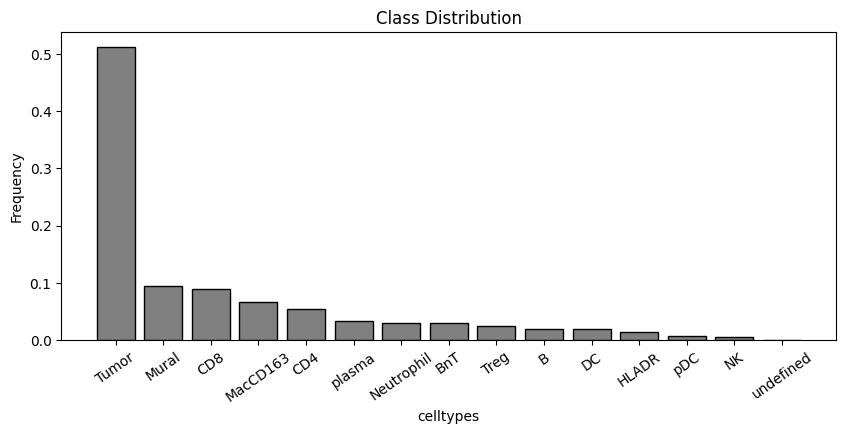

In [122]:
make_class_distribution_plot(train_anndata.obs, 'celltypes', 'Class Distribution')

### Independent obs variables distributions

In [123]:
obs_quant_vars = ['area', 'major_axis_length', 'minor_axis_length', 'eccentricity', 'width_px', 'height_px']
train_anndata.obs[obs_quant_vars].describe()

,area,major_axis_length,minor_axis_length,eccentricity,width_px,height_px
count,236791.000000,236791.000000,236791.000000,236791.000000,236791.000000,236791.000000
mean,80.512287,11.637923,8.299085,0.648591,597.958820,596.481496
std,49.102029,3.898171,2.596641,0.156568,14.548097,18.521637
min,8.000000,3.265986,0.000000,0.000000,500.000000,400.000000
25%,46.000000,8.866005,6.501531,0.551062,600.000000,600.000000
50%,70.000000,11.273253,8.037353,0.665307,600.000000,600.000000
75%,103.000000,13.958597,9.819845,0.764571,600.000000,600.000000
max,1031.000000,60.889864,31.228664,1.000000,641.000000,600.000000


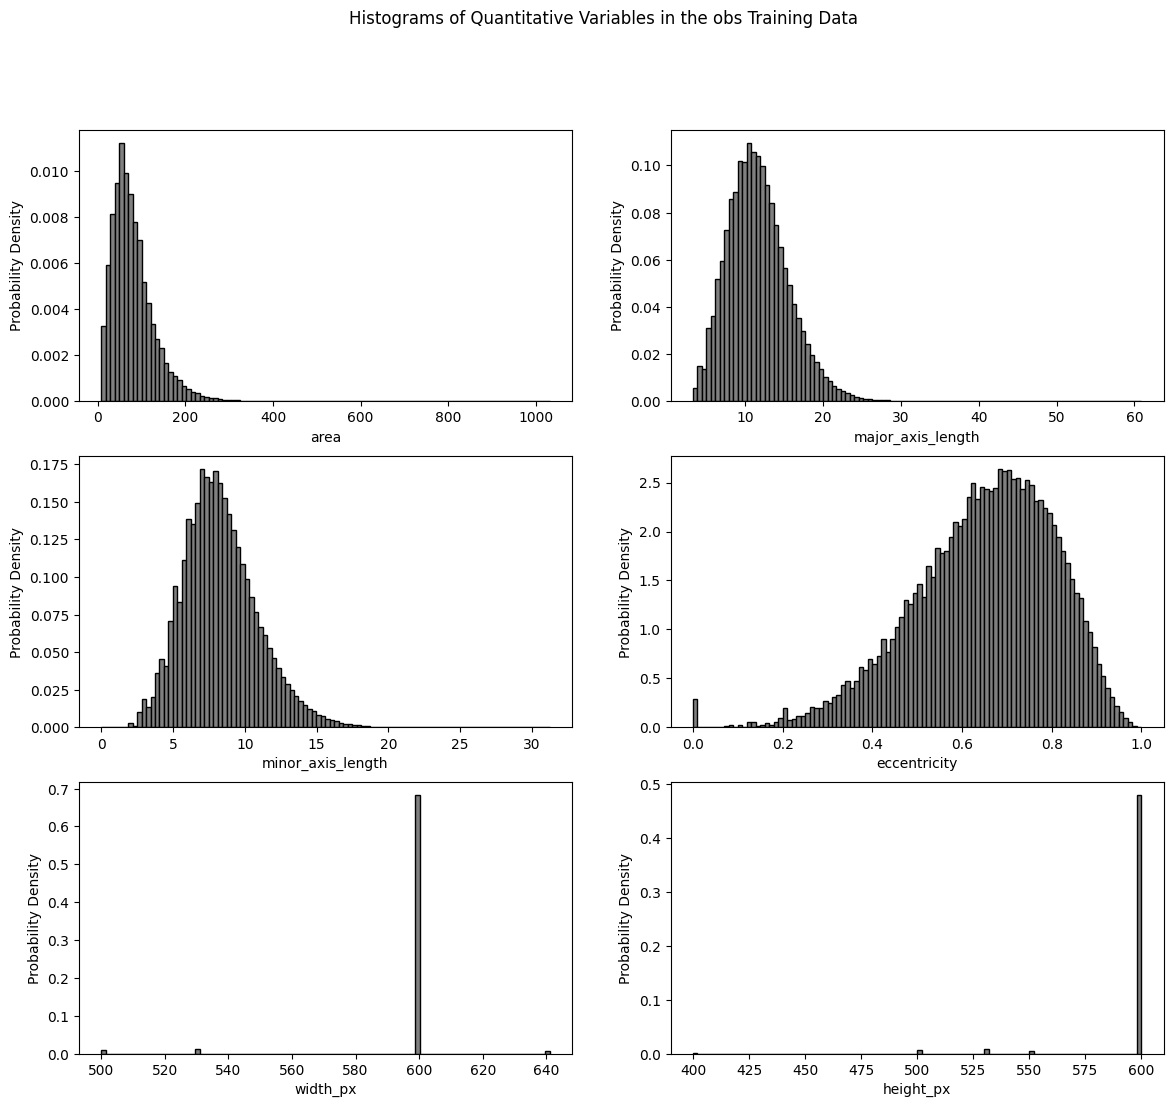

In [124]:
make_histograms(train_anndata.obs, obs_quant_vars, 'Histograms of Quantitative Variables in the obs Training Data')

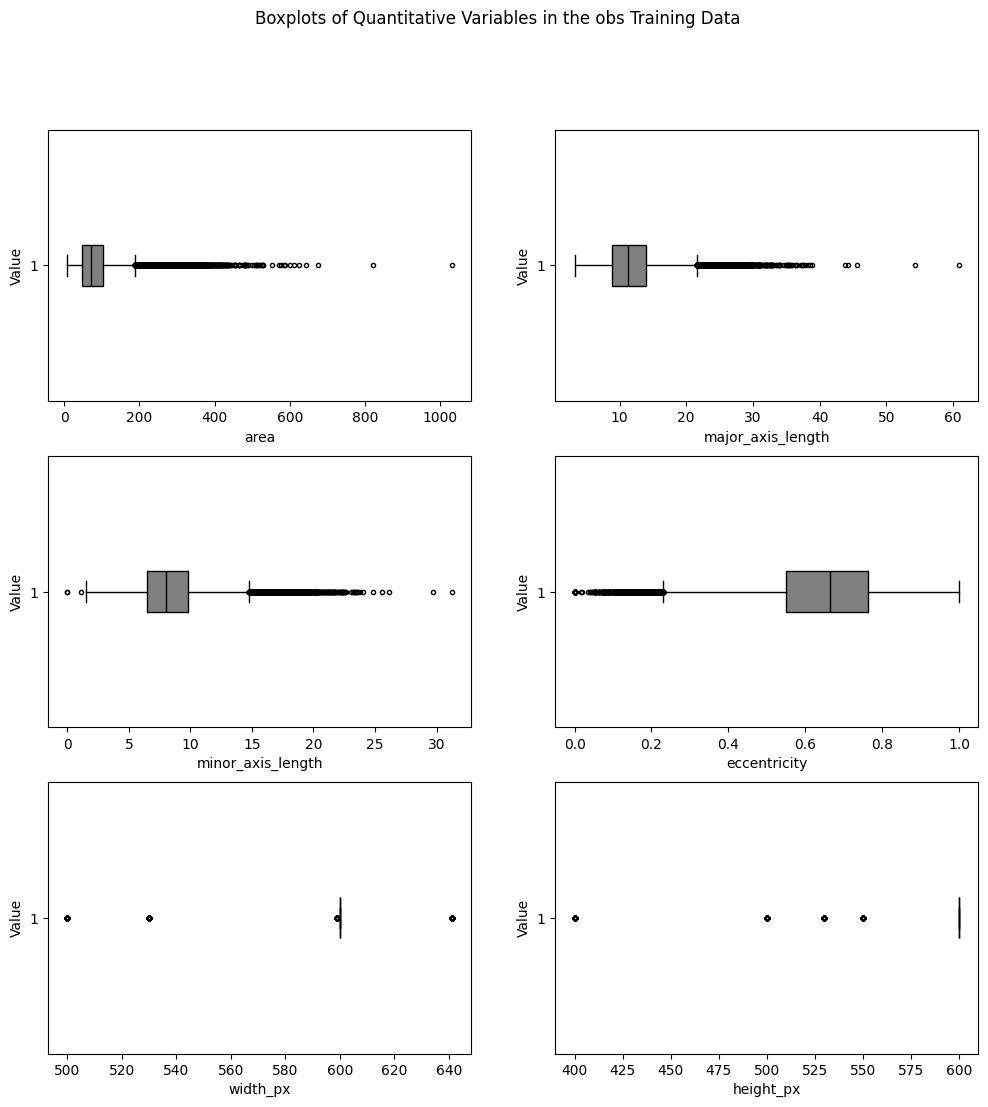

In [125]:
make_boxplots(train_anndata.obs, obs_quant_vars, 'Boxplots of Quantitative Variables in the obs Training Data')

### Independent obs variables distributions per cell type

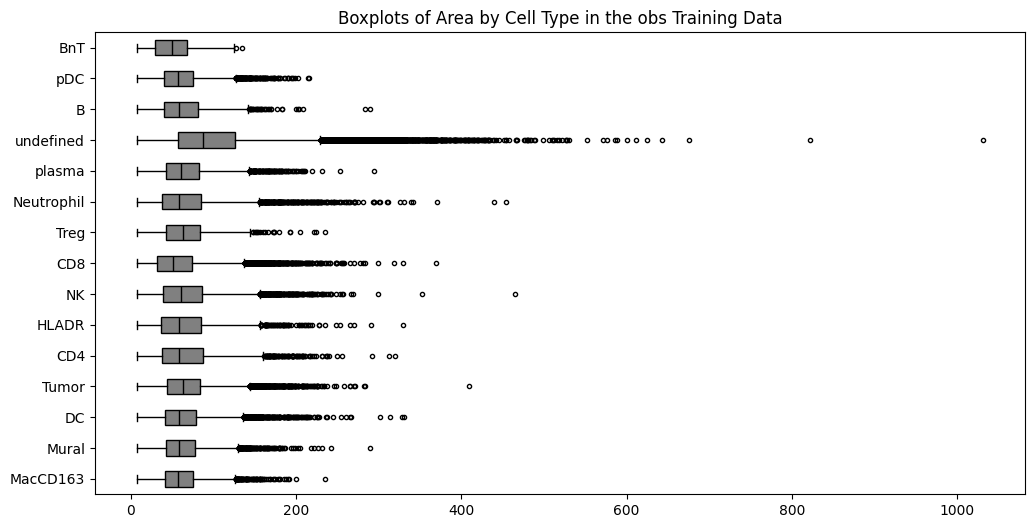

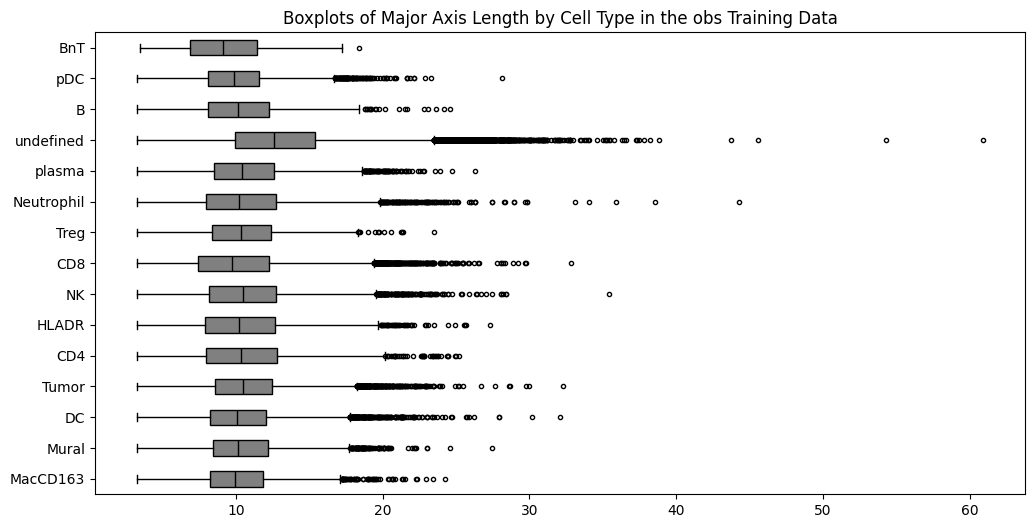

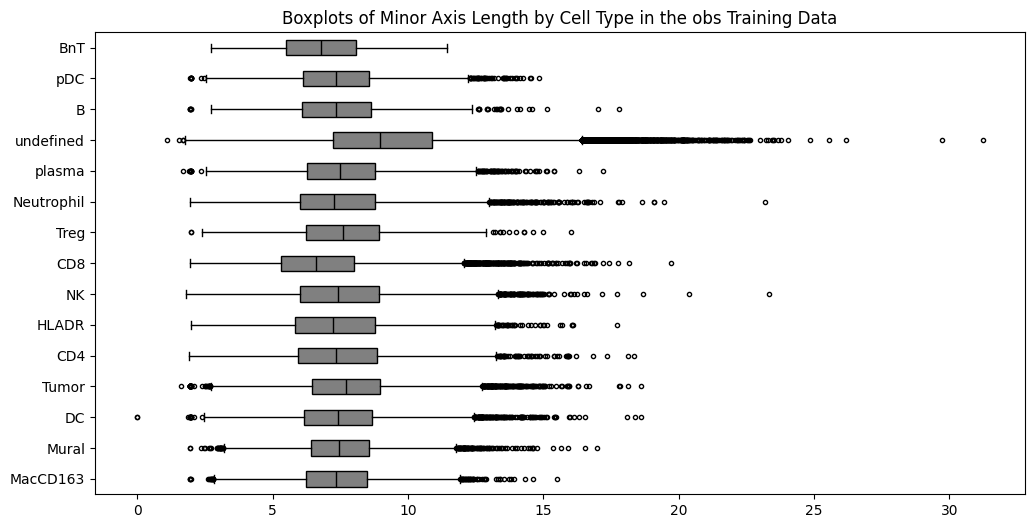

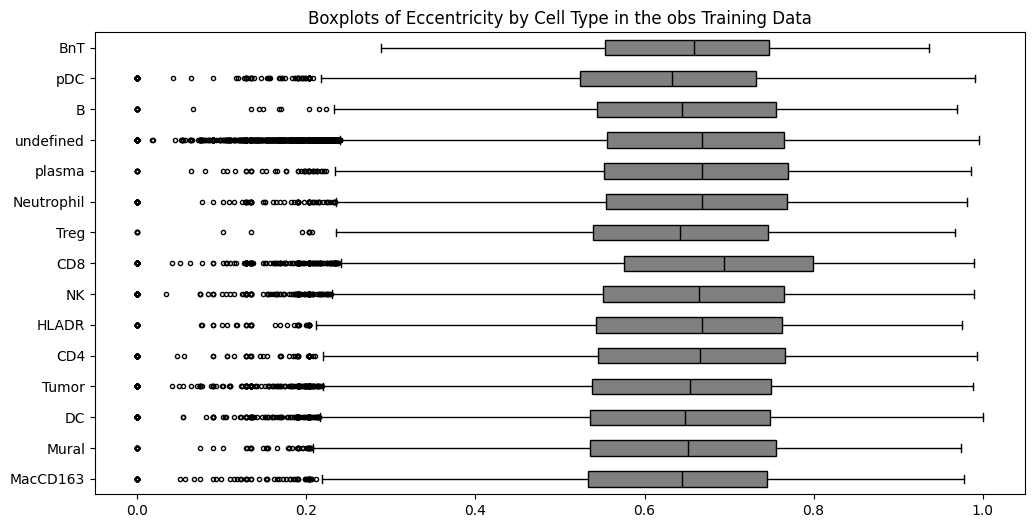

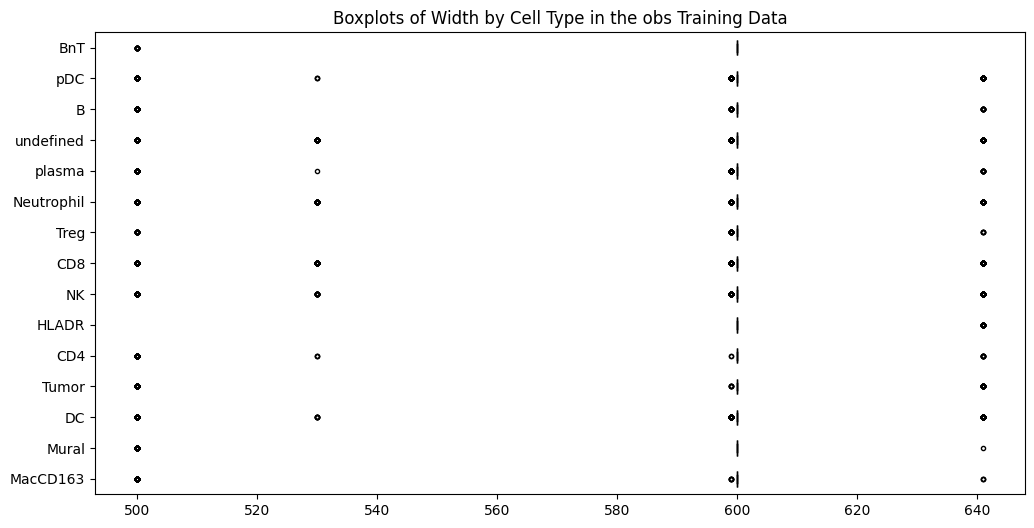

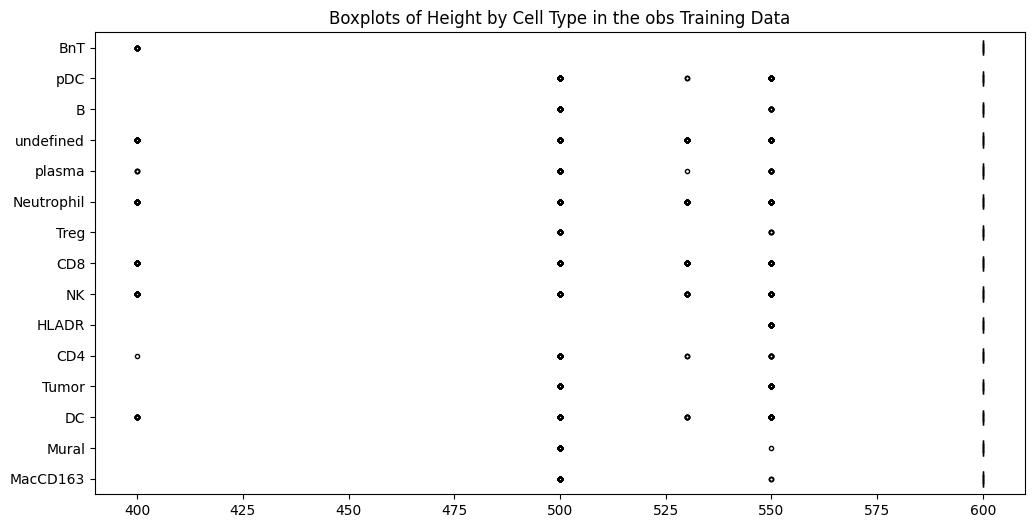

In [126]:
make_boxplots_per_celltype(train_anndata.obs, 'celltypes', 'area', 'Boxplots of Area by Cell Type in the obs Training Data')
make_boxplots_per_celltype(train_anndata.obs, 'celltypes', 'major_axis_length', 'Boxplots of Major Axis Length by Cell Type in the obs Training Data')
make_boxplots_per_celltype(train_anndata.obs, 'celltypes', 'minor_axis_length', 'Boxplots of Minor Axis Length by Cell Type in the obs Training Data')
make_boxplots_per_celltype(train_anndata.obs, 'celltypes', 'eccentricity', 'Boxplots of Eccentricity by Cell Type in the obs Training Data')
make_boxplots_per_celltype(train_anndata.obs, 'celltypes', 'width_px', 'Boxplots of Width by Cell Type in the obs Training Data')
make_boxplots_per_celltype(train_anndata.obs, 'celltypes', 'height_px', 'Boxplots of Height by Cell Type in the obs Training Data')

### Independent obs variables correlations

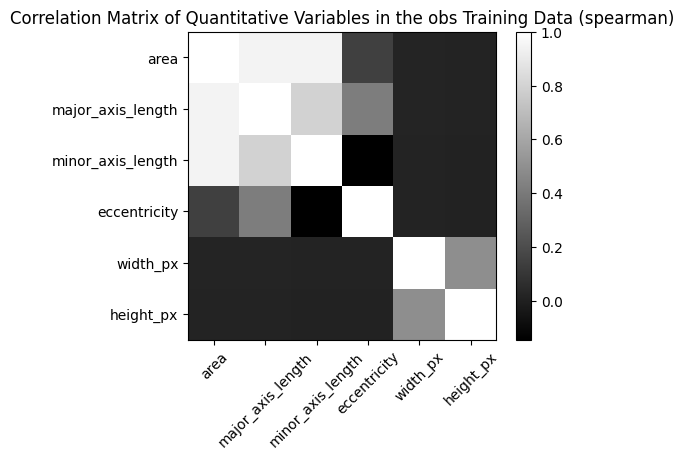

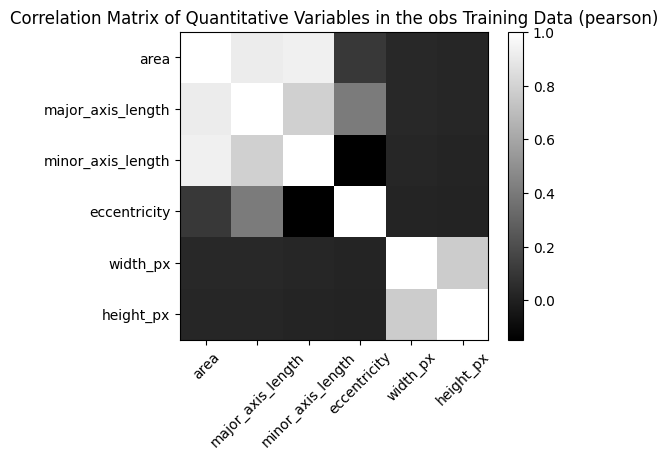

In [127]:
make_corr_plot(train_anndata.obs, obs_quant_vars, 'Correlation Matrix of Quantitative Variables in the obs Training Data (spearman)', method='spearman')
make_corr_plot(train_anndata.obs, obs_quant_vars, 'Correlation Matrix of Quantitative Variables in the obs Training Data (pearson)', method='pearson')

### Independent gene expression variables distributions

In [145]:
train_anndata.var['marker'].values

array(['MPO', 'HistoneH3', 'SMA', 'CD16', 'CD38', 'HLADR', 'CD27', 'CD15',
       'CD45RA', 'CD163', 'B2M', 'CD20', 'CD68', 'Ido1', 'CD3', 'LAG3',
       'CD11c', 'PD1', 'PDGFRb', 'CD7', 'GrzB', 'PDL1', 'TCF7', 'CD45RO',
       'FOXP3', 'ICOS', 'CD8a', 'CarbonicAnhydrase', 'CD33', 'Ki67',
       'VISTA', 'CD40', 'CD4', 'CD14', 'Ecad', 'CD303', 'CD206',
       'cleavedPARP', 'DNA1', 'DNA2'], dtype=object)

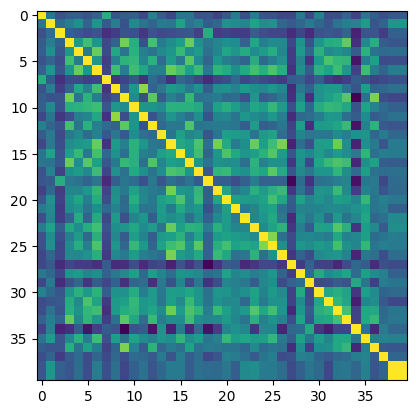

In [143]:
plt.imshow(np.corrcoef(train_anndata.layers['exprs'].T))

In [147]:
marker_names = train_anndata.var['marker'].values

df = pd.DataFrame(values=train_anndata.layers['exprs'], columns=marker_names)
make_corr_plot(df, marker_names, 'Correlation Matrix of Marker Expression in the Training Data (spearman)', method='spearman')

,MPO,HistoneH3,SMA,CD16,CD38,HLADR,CD27,CD15,CD45RA,CD163,B2M,CD20,CD68,Ido1,CD3,LAG3,CD11c,PD1,PDGFRb,CD7,GrzB,PDL1,TCF7,CD45RO,FOXP3,ICOS,CD8a,CarbonicAnhydrase,CD33,Ki67,VISTA,CD40,CD4,CD14,Ecad,CD303,CD206,cleavedPARP,DNA1,DNA2
0,0.000000,1.819988,0.502650,1.265410,0.515007,3.331261,0.403800,0.455421,0.528734,2.948392,2.277988,0.000000,3.995791,0.866176,0.184912,0.521332,1.663381,0.490263,0.498942,0.419894,0.239605,0.253553,0.775550,1.484113,0.359550,0.089989,0.333256,0.757298,0.973576,0.031061,0.792218,0.567238,1.651610,2.556218,0.777378,0.000000,3.581082,0.424273,4.761130,5.301351
1,0.135920,2.393087,1.136961,0.505529,0.605836,0.710857,0.419814,0.100110,0.743002,0.329851,1.477367,0.262420,1.386967,1.676159,0.872805,0.988031,1.035752,0.589124,1.722549,0.656036,0.839118,1.109770,0.906286,1.722290,1.180779,0.249127,1.059537,1.133473,0.446493,0.234338,0.530987,0.603468,1.358368,1.700181,1.884778,0.068872,0.744634,0.118620,5.029241,5.530764
2,0.165905,2.244917,1.396334,1.744382,0.458541,4.006500,0.003607,0.562882,1.236516,1.747839,2.314556,0.528319,2.575711,1.836203,0.930379,1.162658,2.321909,1.215632,0.913848,1.019615,0.791409,1.505715,1.405011,2.573126,1.343356,0.182977,1.229123,1.369524,0.638147,0.297062,0.449097,0.812795,1.949510,3.465199,1.743507,0.403610,2.244398,0.015141,4.418390,4.815923
3,0.165905,1.144778,0.563216,1.166010,0.513735,2.034705,0.650242,0.250150,1.205007,0.990385,2.366212,0.425157,2.512281,2.470739,0.946101,0.874737,1.204903,1.124385,1.071777,1.425236,1.393543,1.415375,1.193558,1.233439,1.533183,0.701011,1.730667,1.592285,0.852129,0.250632,1.866916,1.228290,2.287524,2.491710,2.268924,0.196199,0.946492,0.233095,3.736089,4.368012
4,0.137497,2.210970,0.892371,0.497646,0.412840,1.499184,0.098131,0.208566,0.922874,1.255892,1.354264,0.366437,1.930619,1.904226,0.893713,0.809001,0.978601,0.473835,0.459925,1.198918,0.578973,1.428405,1.064474,1.487346,1.108264,0.278369,1.280757,1.273804,0.423951,0.241149,0.806346,0.360098,1.445085,2.332546,2.387292,0.061568,1.632904,0.372278,4.607359,5.152041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236786,0.223930,5.665851,2.734667,2.338794,0.853400,1.660905,1.660581,1.202203,1.322045,0.789409,1.976963,0.220637,2.115481,0.517040,0.644383,0.720478,1.650989,0.386151,0.792055,0.239513,0.899784,0.178476,0.754571,3.596023,0.240140,0.860990,0.315003,2.084588,0.975347,0.312403,0.402421,0.151767,0.820879,1.591254,1.382112,0.813415,0.531336,0.034725,4.334035,4.838697
236787,0.149443,3.908886,2.751400,0.702922,0.539905,0.435384,0.557881,0.146520,0.402526,0.317224,0.936759,0.147028,0.738948,0.788214,0.341187,0.174570,0.169810,0.134247,1.354394,0.000000,0.663846,0.097863,0.441306,2.440796,0.004736,0.141774,0.211758,0.824652,1.312743,0.054171,0.149241,0.069210,0.256412,1.246646,1.200277,0.230447,0.203544,0.000000,4.633061,5.182098
236788,0.110884,3.520289,0.310834,2.590231,2.336469,3.652604,1.443007,0.248852,0.455855,1.025672,3.085321,0.583498,2.311474,0.469374,2.016449,0.522411,2.542577,0.307162,1.495583,0.742843,1.085099,0.622120,0.583110,2.741184,0.496487,0.614790,2.606248,1.073647,2.646541,0.003931,0.667975,0.434373,1.868607,2.931921,1.427727,0.994726,0.224414,0.102515,4.303070,4.826098
236789,0.150941,4.214958,2.651646,0.807826,0.403674,1.226701,0.400776,0.265660,0.513530,0.168271,1.081097,0.261896,0.690424,0.488260,0.292877,0.345367,0.221051,0.169689,0.856244,0.045667,0.648675,0.178555,1.350036,2.750609,0.418827,0.000000,0.129196,1.265307,0.455750,0.101369,0.256219,0.096142,0.244681,1.495089,0.792030,0.047485,0.090598,0.083975,4.822456,5.361662


### PCA 2 components plot

### Umap

### T-sne

### Self organizing maps